In [1]:
import pandas as pd
import pyreadstat
import os
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
political_survey_list = os.listdir(r'D:/Pew_research_center/raw/political/')                     

In [3]:
extreme_df = pd.DataFrame(index=[item[:-4] for item in political_survey_list], columns=['extreme_ratio', 'extreme_right_ratio', 'extreme_left_ratio'])
df_list = []
for f in political_survey_list:
    filename = r'D:\\Pew_research_center\\raw/political\\' + f
    df, meta = pyreadstat.read_sav(filename)
    if 'ideo' not in df.columns:
        df_list.append(df)
        continue
    else:
        extreme = len(df[(df.ideo == 1) | (df.ideo == 5)]) / len(df)
        extreme_right = len(df[(df.ideo == 1)]) / len(df[(df.ideo == 1) | (df.ideo == 2)])
        extreme_left = len(df[(df.ideo == 5)]) / len(df[(df.ideo == 4) | (df.ideo == 5)])
        extreme_df.loc[f[:-4], :] = [extreme, extreme_right, extreme_left]
        df_list.append(df)

In [4]:
US_list = os.listdir(r'D:/Pew_research_center/raw/US_trend/') 
extreme_US_df = pd.DataFrame(index=[item[:-4] for item in US_list], columns=['extreme_ratio', 'extreme_right_ratio', 'extreme_left_ratio'])
df_list_US = []
for f in US_list:
    filename = r'D:\\Pew_research_center\\raw\\US_trend\\' + f
    df, meta = pyreadstat.read_sav(filename)
    if 'F_IDEO_FINAL' not in df.columns:
        df_list_US.append(df)
        continue
    else:
        extreme = len(df[(df.F_IDEO_FINAL == 1) | (df.F_IDEO_FINAL == 5)]) / len(df)
        extreme_right = len(df[(df.F_IDEO_FINAL == 1)]) / len(df[(df.F_IDEO_FINAL == 1) | (df.F_IDEO_FINAL == 2)])
        extreme_left = len(df[(df.F_IDEO_FINAL == 5)]) / len(df[(df.F_IDEO_FINAL == 4) | (df.F_IDEO_FINAL == 5)])
        extreme_US_df.loc[f[:-4], :] = [extreme, extreme_right, extreme_left]
        df_list_US.append(df)

In [19]:
def plot_time_series(df, series_type, plot_title):
    df = df.sort_index()
    ax = sns.lineplot(x=df.index, y=df[series_type].astype(np.float64))
    ax.set(xlabel='Time', ylabel=series_type)
    ax.set_title(plot_title)
    for item in ax.get_xticklabels():
        item.set_rotation(45)
    plt.show()

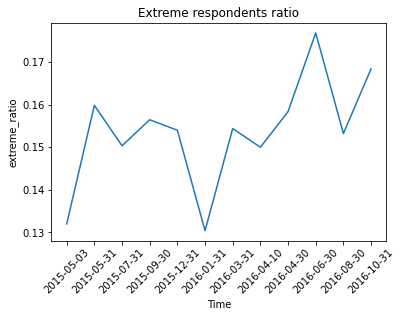

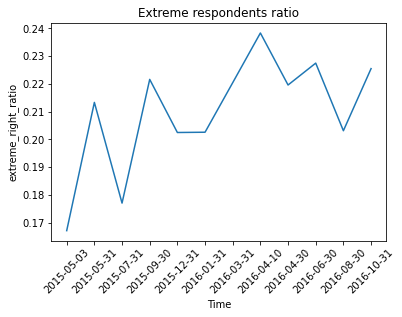

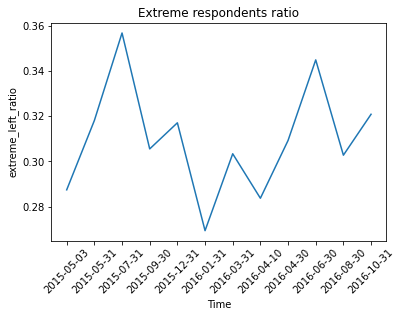

In [22]:
for col in extreme_df:
    plot_time_series(extreme_df, col, 'Extreme respondents ratio')

In [55]:
social_media_df = df_list_US[1]

In [54]:
for i in df_list_US[1]['LEARNELECTTOP_W14'].unique():
    print(len(df_list_US[1][df_list_US[1]['LEARNELECTTOP_W14'] == i])/len(df_list_US[1][df_list_US[1]['LEARNELECTTOP_W14'].notnull()]))

0.2755598831548199
0.12293086660175268
0.12244401168451802
0.0
0.027020447906523856
0.1443524829600779
0.056962025316455694
0.08690360272638753
0.03554040895813048
0.03700097370983447
0.018743914313534567
0.012171372930866602
0.019961051606621226
0.008519961051606621
0.011197663096397274
0.012658227848101266
0.0024342745861733205
0.002677702044790652
0.0007302823758519961
0.0017039922103213243
0.00024342745861733204
0.00024342745861733204


In [61]:
social_media_usage_col = [col for col in social_media_df.columns if 'SNSELECT' in col]
for col in social_media_usage_col:
    df = social_media_df[social_media_df[col].notnull()]
    print(len(df[df[col] == 1])/len(df))

0.5115264797507788
0.42951541850220265
0.25615212527964204
0.04821958456973294
0.12111468381564845
0.1391304347826087
0.21717171717171718
0.17859952793076317
0.4652777777777778
0.09567198177676538
